In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_seasons_working.csv')

In [3]:
# Is there a correlation between draft number and player stats?

# changing 'draft number' column from object type to int type 
df.draft_number = pd.to_numeric(df.draft_number, errors='coerce').fillna(0).astype(np.int64)
# # group by name
mean_val_players = df.groupby('player_name').mean()
# dropping players with draft number not in range(1, 61) (we want to base on new form of draft where max draft number is 60)
drafted_players_grouped = mean_val_players[(mean_val_players['draft_number'] > 0) & (mean_val_players['draft_number'] < 61)] 
drafted_players_grouped

,Unnamed: 0,age,player_height,player_weight,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
player_name,,,,,,,,,,,,,,,
A.C. Green,1114.400000,35.000000,205.74,102.058200,23.0,75.800000,5.780000,6.060000,0.860000,-1.880000,0.093000,0.186400,0.127400,0.486800,0.054000
A.J. Bramlett,1711.000000,23.000000,208.28,102.965384,39.0,8.000000,1.000000,2.800000,0.000000,-32.600000,0.158000,0.208000,0.146000,0.190000,0.000000
A.J. Guyton,2524.333333,24.000000,185.42,81.646560,32.0,26.666667,3.800000,0.700000,1.566667,-6.700000,0.013333,0.040000,0.224000,0.324000,0.282000
AJ Hammons,9404.000000,24.000000,213.36,117.933920,46.0,22.000000,2.200000,1.600000,0.200000,-0.600000,0.049000,0.199000,0.167000,0.472000,0.038000
AJ Price,7113.833333,25.500000,187.96,84.821704,52.0,43.500000,5.350000,1.333333,2.000000,-2.233333,0.017667,0.090833,0.210667,0.476500,0.248833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zhaire Smith,10809.000000,20.500000,191.77,91.625584,16.0,6.500000,3.900000,1.250000,1.000000,-2.500000,0.014000,0.083500,0.165500,0.423000,0.092000
Zhou Qi,10338.000000,22.500000,215.90,95.254320,43.0,9.500000,1.600000,0.600000,0.050000,-46.400000,0.021000,0.058000,0.248000,0.647500,0.014000
Zion Williamson,11075.000000,19.500000,199.39,128.820128,1.0,42.500000,24.750000,6.750000,2.900000,3.600000,0.086500,0.122500,0.289000,0.632500,0.153500


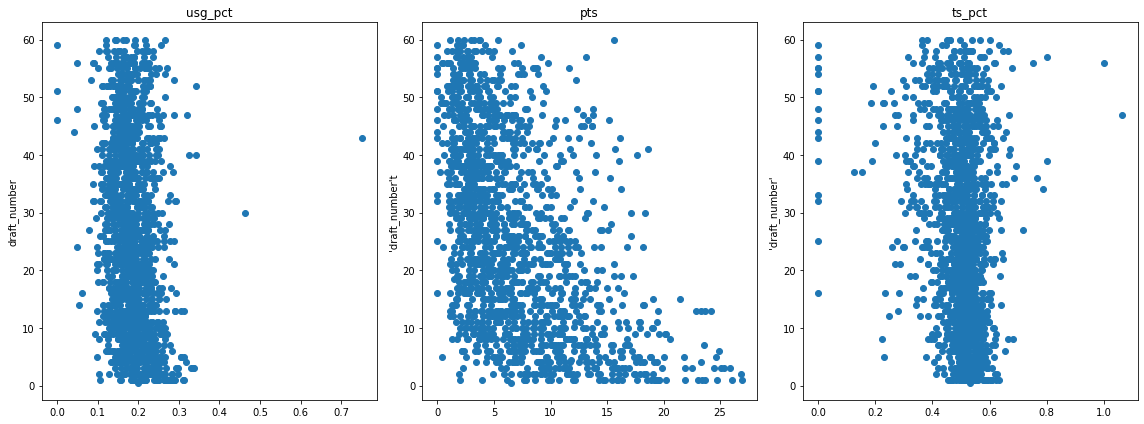

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(drafted_players_grouped['usg_pct'],drafted_players_grouped['draft_number'],'o')
axes[0].set_ylabel("draft_number")
axes[0].set_title("usg_pct")

axes[1].plot(drafted_players_grouped['pts'],drafted_players_grouped['draft_number'],'o')
axes[1].set_title("pts")
axes[1].set_ylabel("'draft_number't")

axes[2].plot(drafted_players_grouped['ts_pct'],drafted_players_grouped['draft_number'],'o')
axes[2].set_title("ts_pct");
axes[2].set_ylabel("'draft_number'")
plt.tight_layout();

In [5]:
# separate into features and labels so we will create 2 matrixes
# features - remaining columns that are not your label column
X = drafted_players_grouped.drop(columns=['draft_number', 'age', 'gp', 'Unnamed: 0'], axis=1)
print(X)
# label column
y = drafted_players_grouped['draft_number']
print(y)

from sklearn.model_selection import train_test_split

# separates the features (x) and later labels (y) - do not change the order of unpacking
# test size - what percentage of data should go to the test set (around 30 percent)
# random_state - controls the shuffling of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

                    player_height  player_weight        pts       reb  \
player_name                                                             
A.C. Green                 205.74     102.058200   5.780000  6.060000   
A.J. Bramlett              208.28     102.965384   1.000000  2.800000   
A.J. Guyton                185.42      81.646560   3.800000  0.700000   
AJ Hammons                 213.36     117.933920   2.200000  1.600000   
AJ Price                   187.96      84.821704   5.350000  1.333333   
...                           ...            ...        ...       ...   
Zhaire Smith               191.77      91.625584   3.900000  1.250000   
Zhou Qi                    215.90      95.254320   1.600000  0.600000   
Zion Williamson            199.39     128.820128  24.750000  6.750000   
Zoran Planinic             200.66      89.962413   3.833333  1.333333   
Zydrunas Ilgauskas         220.98     117.933920  12.938462  7.338462   

                         ast  net_rating  oreb_pct

In [6]:
X_test

,player_height,player_weight,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
player_name,,,,,,,,,,,
Deni Avdija,205.740,95.254320,6.300000,4.900000,1.200000,-2.100000,0.017000,0.181000,0.118000,0.515000,0.064000
Giannis Antetokounmpo,210.185,102.851986,21.437500,9.337500,4.550000,4.512500,0.055000,0.231375,0.269500,0.590375,0.232250
Marcus Morris,205.740,106.594120,9.716667,3.816667,1.366667,-2.050000,0.043167,0.135167,0.198167,0.495833,0.081500
Brandon Bass,203.200,112.264020,7.816667,4.175000,0.700000,-2.258333,0.083667,0.171500,0.184500,0.545083,0.056500
Nick Van Exel,185.420,86.545354,13.950000,2.890000,6.270000,-0.610000,0.014000,0.088000,0.222600,0.500100,0.315400
...,...,...,...,...,...,...,...,...,...,...,...
Solomon Hill,200.025,102.171598,4.812500,2.962500,1.425000,-1.150000,0.035750,0.124000,0.121875,0.498000,0.097625
David Vaughn,205.740,108.862080,3.266667,3.300000,0.266667,-5.200000,0.131333,0.209000,0.176667,0.518000,0.043000
Andrae Patterson,205.740,107.954896,2.250000,1.150000,0.300000,-5.700000,0.078500,0.113500,0.152500,0.627500,0.078500


In [7]:
# help(train_test_split)

In [8]:
# creating an estimator within Sklearn
from sklearn.linear_model import LinearRegression

In [9]:
# read, look up to hyperparameters ( parameters to adjust for better performance)
# help(LinearRegression)

In [10]:
# first time use default and check default performance, after that change parameters/hyperparameters
# it creates and instance of linear regression model
# (model will 'learn' the beta coefficients for the best fitting line. 
# we did not tell the computer what those Beta coeffcient values were, it learned those through gradient descent)
model = LinearRegression()

In [11]:
# now this 'model' instance is waiting for data to be trained on
# we do it by calling fir method on model
model.fit(X_train,y_train)

LinearRegression()

In [12]:
# now we want to predict on test features and compare with y_test
test_predictions = model.predict(X_test)

# compare test predictions with y_test values (true values for X_test features)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# checking the mean value of usg_pct column 
mean_val = drafted_players_grouped['draft_number'].mean()
print(mean_val)

# checking the mean absolute error
mean_abs_err = mean_absolute_error(y_test, test_predictions)
print(mean_abs_err)
# in comparison to avg value, mean absolute error is 

25.952116564417175
11.728554179558824


In [13]:
# checking the mean squared error
mean_sqr_err = mean_squared_error(y_test, test_predictions)
print(mean_sqr_err)

# to compare with mean_val we need to use sqrt func on mean_sqr_err
# checking the root mean squared error
root_mean_sqrt_err = np.sqrt(mean_sqr_err)
print(root_mean_sqrt_err)

203.89212510120413
14.279079980909279


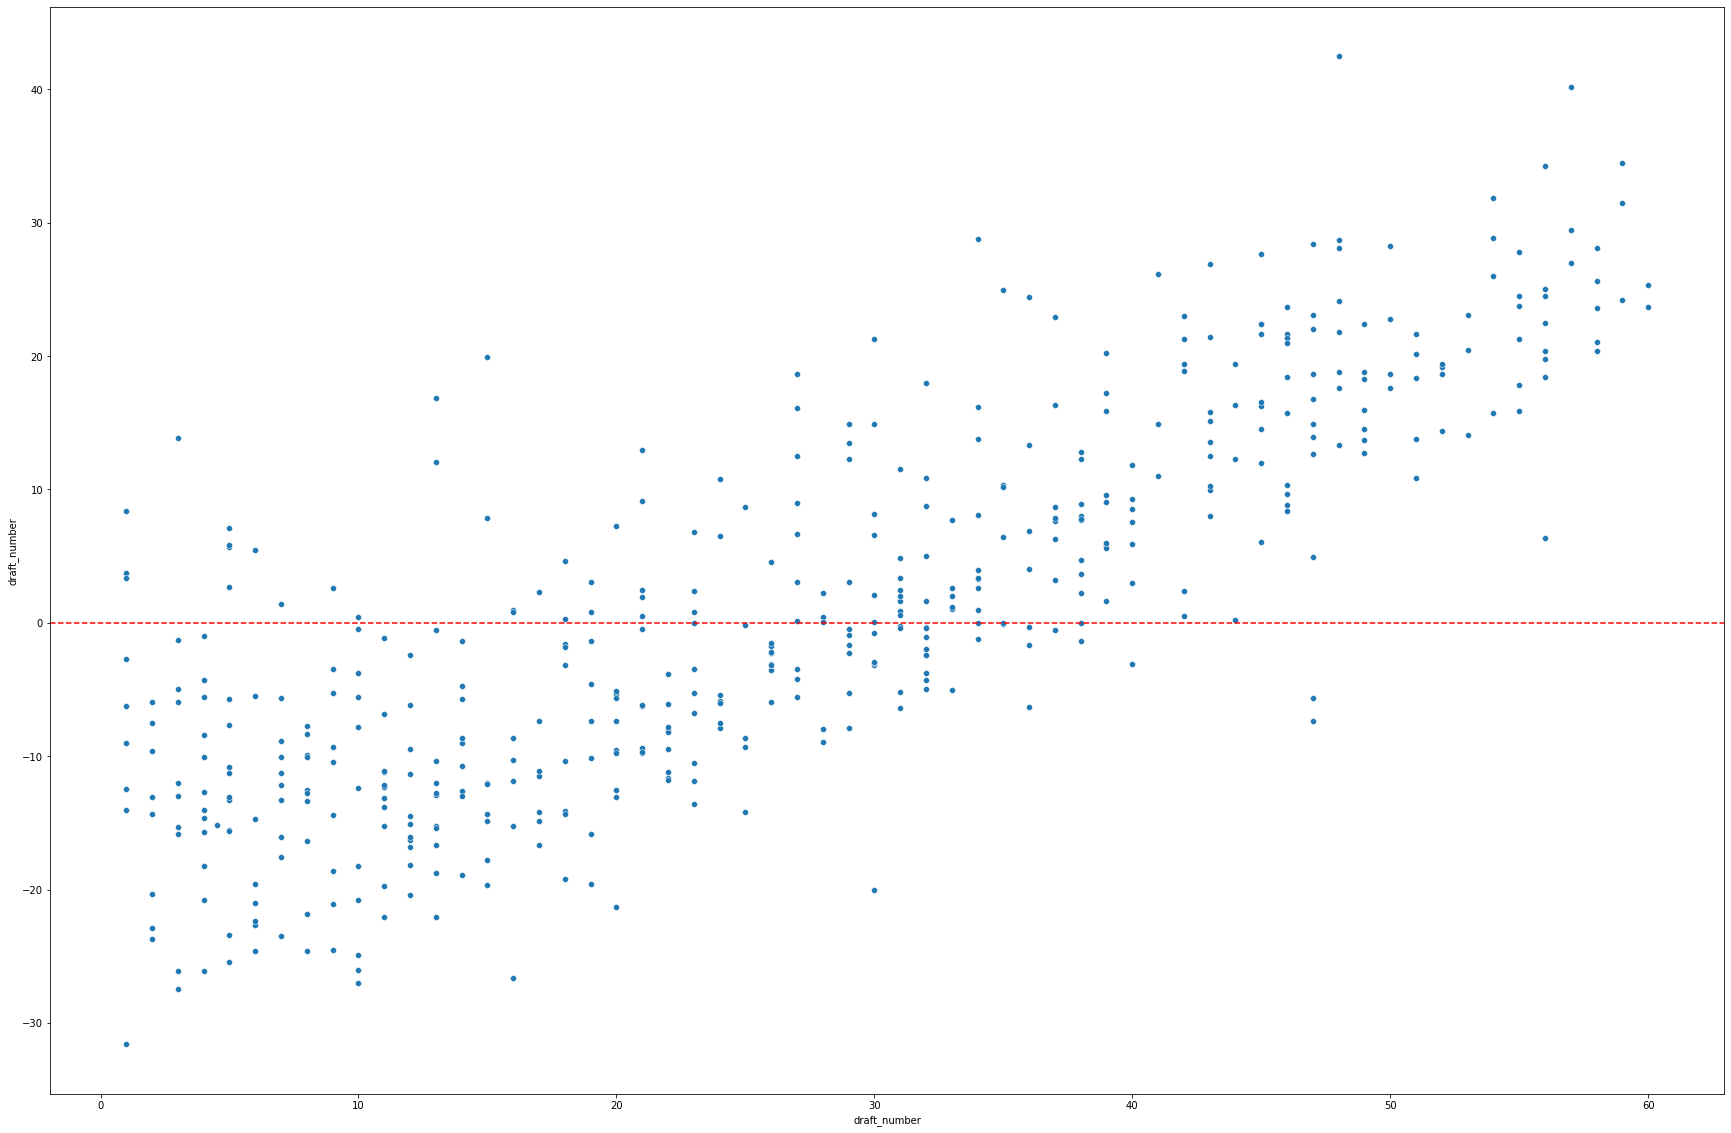

In [14]:
test_residuals = y_test - test_predictions
test_residuals
fig = plt.gcf()
fig.set_size_inches(30, 20)
# checking if using linear regression is fine, the data below should be distributed randomly
# if its not we should consider not using linear regression
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

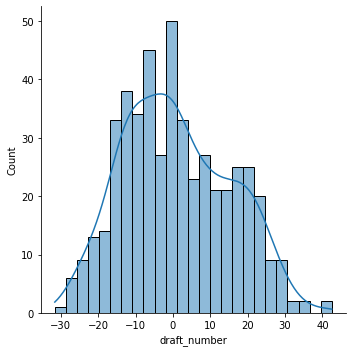

In [15]:
# check if distribution is normal
sns.displot(test_residuals, bins=25, kde=True)

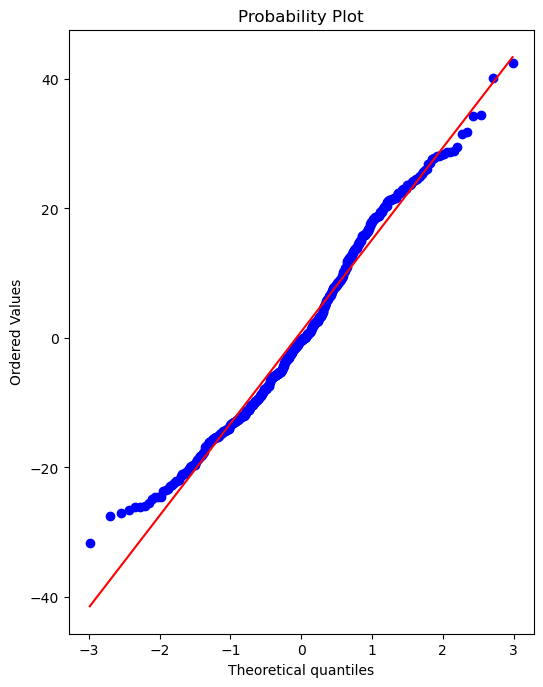

In [16]:
import scipy as sp

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
#probplot returns the raw values if needed
# want to see the plot, so we assign these values to
_ = sp.stats.probplot(test_residuals, plot=ax)

# The red line is 'normal distribution' 

In [17]:
# DEPLOYMENT OF THE MODEL
# this should be the same model that was adjusted on test set of data
final_model = LinearRegression()

# fit final model on a full data 
final_model.fit(X,y)

LinearRegression()

In [18]:
# checking the coefficients
# every coefficient is for another column in data

# (if coef ~ 0, there is no corelation)
final_model.coef_
# if I increase reb by one unit, i can expect decreasing draft_number by 1,82

array([-3.09214932e-01,  2.16846638e-02, -8.89335330e-01, -1.60784774e+00,
       -2.00992307e+00, -2.18443946e-02,  3.85305148e+01,  5.20555442e+00,
       -2.91552514e+00,  5.49206580e+00,  1.47492516e+01])

In [19]:
X.columns


Index(['player_height', 'player_weight', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')

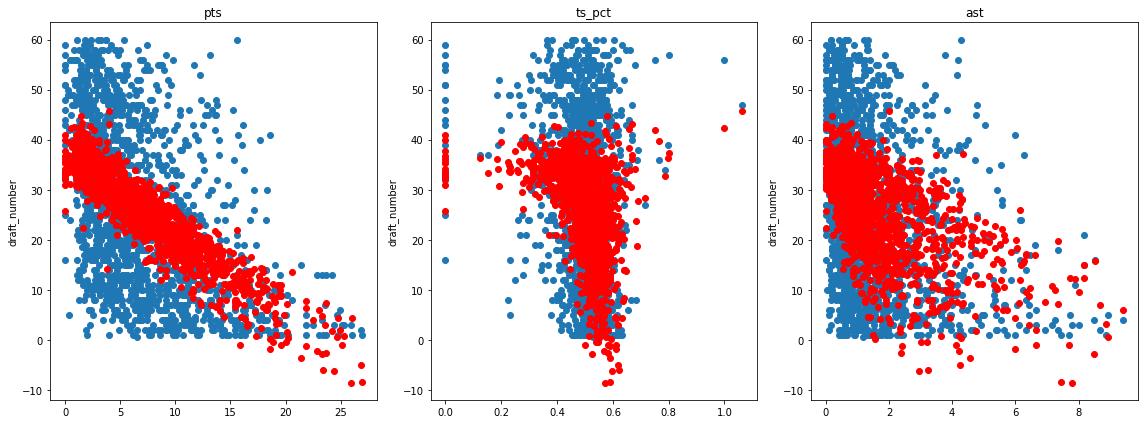

In [27]:
# showing on plot true values and values predicted by a model
y_hat = final_model.predict(X)

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(drafted_players_grouped['pts'],drafted_players_grouped['draft_number'],'o')
axes[0].plot(drafted_players_grouped['pts'],y_hat,'o',color='red')
axes[0].set_ylabel('draft_number')
axes[0].set_title("pts")

axes[1].plot(drafted_players_grouped['ts_pct'],drafted_players_grouped['draft_number'],'o')
axes[1].plot(drafted_players_grouped['ts_pct'],y_hat,'o',color='red')
axes[1].set_title("ts_pct")
axes[1].set_ylabel('draft_number')

axes[2].plot(drafted_players_grouped['ast'],drafted_players_grouped['draft_number'],'o')
axes[2].plot(drafted_players_grouped['ast'],y_hat,'o',color='red')
axes[2].set_title("ast");
axes[2].set_ylabel('draft_number')
plt.tight_layout();

# red color are values predicted by a model

In [21]:
# DEPLOING A MODEL
from joblib import dump, load
# now we are saving a model
dump(final_model, 'final_draft_predict.joblib')

['final_draft_predict.joblib']

In [22]:
# loading ready model 
loaded_model = load('final_draft_predict.joblib')

# model coeficients:
loaded_model.coef_

array([-3.09214932e-01,  2.16846638e-02, -8.89335330e-01, -1.60784774e+00,
       -2.00992307e+00, -2.18443946e-02,  3.85305148e+01,  5.20555442e+00,
       -2.91552514e+00,  5.49206580e+00,  1.47492516e+01])

In [23]:
# Lets try to predict draft number for a player with stats like these:
# something around Lebron James stats:
some_guy = [[206, 113, 27, 9, 7, 2.5, 0.08, 0.05, 0.3, 0.55, 0.3]]

In [24]:
loaded_model.predict(some_guy)
# we can see that prediction is bad, we should have in mind Root mean squared error = 15.941671026531449
# this is pretty big error for such a data

array([-10.76028029])